In [1]:
import pandas as pd 
import numpy as np    
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv(r"C:\Users\ritik\Downloads\GREENSKILL ai data.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
scaler= StandardScaler()
data[['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)','Wind Direction (°)'
]]=scaler.fit_transform(data[['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)','Wind Direction (°)']])

In [4]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,-0.706800,-0.531476,-0.786435,1.458725
1,01 01 2018 00:10,-0.650629,-0.446115,-0.710712,1.551254
2,01 01 2018 00:20,-0.762932,-0.554021,-0.805023,1.593244
3,01 01 2018 00:30,-0.676628,-0.449071,-0.713483,1.579260
4,01 01 2018 00:40,-0.706340,-0.468406,-0.731337,1.519504


In [5]:
print(data.isnull().sum()) 

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB
None


In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Date/Time'] = encoder.fit_transform(data['Date/Time'])
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,0,-0.706800,-0.531476,-0.786435,1.458725
1,1,-0.650629,-0.446115,-0.710712,1.551254
2,2,-0.762932,-0.554021,-0.805023,1.593244
3,3,-0.676628,-0.449071,-0.713483,1.579260
4,4,-0.706340,-0.468406,-0.731337,1.519504


In [8]:
X = data[['Date/Time','Wind Direction (°)','Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)']]
y = data['LV ActivePower (kW)']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,Date/Time,Wind Direction (°),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
13791,17291,0.601369,-1.125805,-1.090768
46267,3074,-0.005468,-0.613824,-0.851718
42105,49200,0.937969,1.226081,1.535511
21123,777,-0.741219,-0.109597,-0.316514
11823,45557,-0.865915,-0.302425,-0.562677
...,...,...,...,...
11284,39112,0.696312,-0.727641,-0.931247
44732,35046,0.548094,-0.025798,-0.190473
38158,46421,-0.640326,0.372293,0.538762
860,9941,0.881992,1.127208,1.514089


In [11]:
y_train

13791   -0.996372
46267   -0.773757
42105    1.585017
21123   -0.171674
11823   -0.577107
           ...   
11284   -0.863762
44732   -0.143992
38158    0.471024
860      1.734247
15795   -0.996372
Name: LV ActivePower (kW), Length: 40424, dtype: float64

In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)
y_pred

array([ 1.36671391,  1.10608964, -0.66473348, ..., -0.9930658 ,
       -0.26321908, -0.99556387])

In [14]:
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.9685857424432421


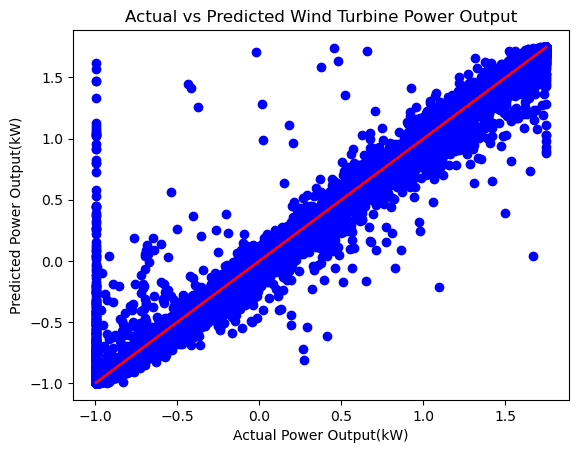

In [15]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red') 
plt.xlabel('Actual Power Output(kW)')
plt.ylabel('Predicted Power Output(kW)')
plt.title('Actual vs Predicted Wind Turbine Power Output')
plt.show()

In [16]:
import joblib

joblib.dump(model, 'Greenskill_AI_model.pkl')

['Greenskill_AI_model.pkl']

In [17]:
import joblib

# Save the scaler and encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

print("Model, scaler, and encoder have been saved.")

Model, scaler, and encoder have been saved.
